# Assignment
1. Klik pada file lalu pilih `save a copy in drive` untuk file Format Task Assignment.ipynb ini
2. Download dataset : https://drive.google.com/drive/folders/1FyigllyrhI-sAsjbPaLfwV7REwLqe_xt?usp=sharing
3. Data ini hanya terdiri dari dua kolom: Jam dan Skor. Regresi linear sangat efektif digunakan untuk memprediksi skor siswa berdasarkan jumlah jam belajar.
4. Lakukan hal berikut :
- Import dataset
- Exploratory Data Analysis : statistical summary untuk mengetahui rata-rata, median, mean dkk, lalu lakukan scatter plot.
- lakukan analisis lainnya semisal correlation heatmap (opsional)
- feature engineering (check duplikat data dan drop duplikat, check missing value, check outlier
- splitting data ke X_train,X_test,y_train,y_test
- lakukan regresi modelling memakai linear regression, decision tree atau random forest (gunakan minimal 2 model)
- pada model linear regression keluarkan nilai intercept dan coef, namun pada decision tree dan random forest tidak bisa mengeluarkan nilai intercept dan coef karena libraries nya tidak support.
- Plotting the actual and predicted values pada tiap model
- Keluarkan nilai R-Score untuk membandingkan 2 model yang anda gunakan dan berikan kesimpulan model terbaik dengan melihat R-Score tertinggi.

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline 

### Import dataset

In [43]:
# read the dataset using pandas
data = pd.read_csv('student_scores.csv')
display(data.sort_values(by='Hours',ascending=False, ignore_index=True))

,Hours,Scores
0,9.2,88
1,8.9,95
2,8.5,75
3,8.3,81
4,7.8,86
5,7.7,85
6,7.4,69
7,6.9,76
8,6.1,67
9,5.9,62


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [46]:
data.Hours.mode()

0    2.5
1    2.7
Name: Hours, dtype: float64

In [47]:
data.Scores.mode()

0    30
Name: Scores, dtype: int64

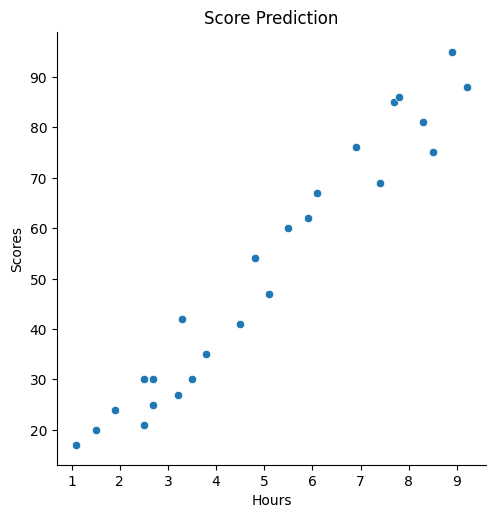

In [48]:
#plt.figure(figsize=(5,5))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],height=5,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

In [49]:
df = data.copy()
print(df.shape)
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before
df = df.drop_duplicates()
print(df.shape)

(25, 2)
(25, 2)


In [50]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

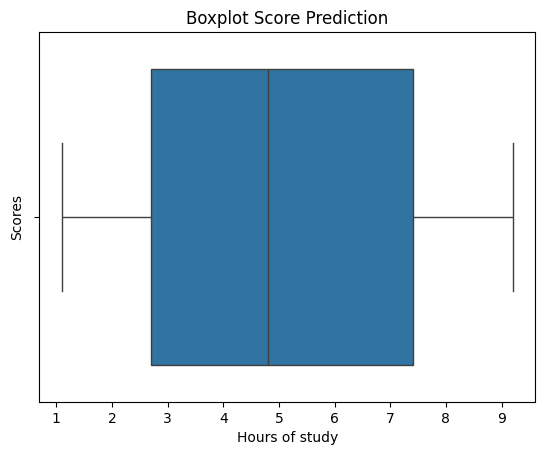

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.title("Boxplot Score Prediction")

# Menampilkan plot
plt.show()

In [65]:
Q1 = data.Scores.quantile(0.25)
Q3 = data.Scores.quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

# Menghitung rentang total data
data_range = data.Scores.max() - data.Scores.min()

print("Total Data Range:", data_range)
print(IQR*100/data_range)
print(data_range/IQR)

Interquartile Range (IQR): 45.0
Total Data Range: 78
57.69230769230769
1.7333333333333334


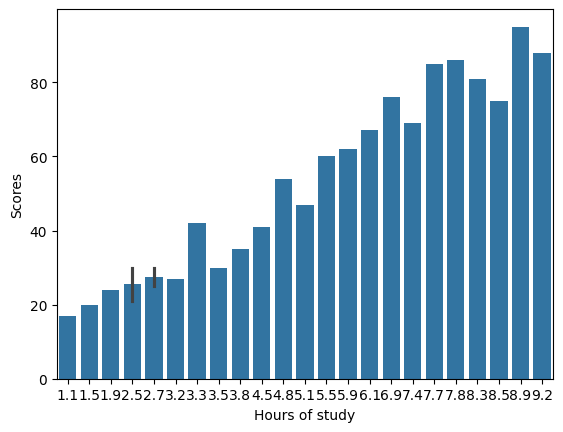

In [52]:
sns.barplot(data, x="Hours", y="Scores")
plt.xlabel('Hours of study')
plt.show()


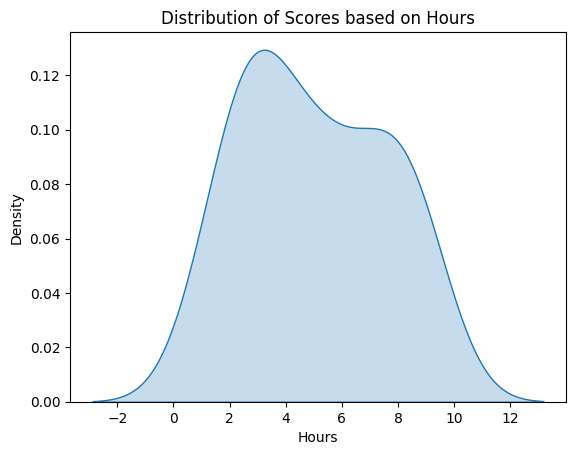

In [53]:
import seaborn as sns

sns.kdeplot(data=data, x="Hours", fill=True)
#sns.kdeplot(data=data, x="Hours", hue='Scores', fill=True)

plt.xlabel('Hours')
plt.ylabel('Density')
plt.title('Distribution of Scores based on Hours')
plt.show()


In [54]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Scores')
y = data.Scores
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

In [55]:
# mencari parameter alpha terbaik untuk Ridge dan Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Model 
Ridge = Ridge()
Lasso = Lasso()

# Daftar parameter yang akan diuji
parameters = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Grid Search Cross Validation
grid_search_ridge = GridSearchCV(Ridge, parameters, cv=5)
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso = GridSearchCV(Lasso, parameters, cv=5)
grid_search_lasso.fit(X_train, y_train)

# Parameter terbaik
print("Parameter Terbaik untuk Ridge Regression:", grid_search_ridge.best_params_)
print("Skor Kinerja Terbaik                    :", grid_search_ridge.best_score_)

print("Parameter Terbaik untuk Lasso Regression:", grid_search_lasso.best_params_)
print("Skor Kinerja Terbaik                    :", grid_search_lasso.best_score_)


Parameter Terbaik untuk Ridge Regression: {'alpha': 0.1}
Skor Kinerja Terbaik                    : 0.7232345485735696
Parameter Terbaik untuk Lasso Regression: {'alpha': 0.1}
Skor Kinerja Terbaik                    : 0.7227746293565656


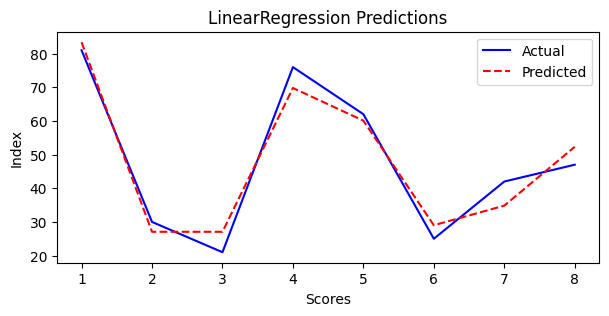

Intercept of the LinearRegression: 2.794196676599803
Coefficient of the LinearRegression: [9.71054094]


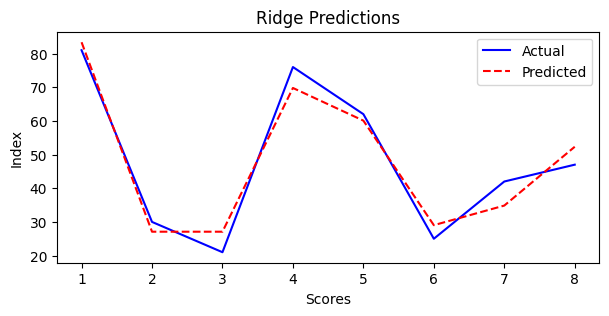

Intercept of the Ridge: 2.8373687928946225
Coefficient of the Ridge: [9.70221034]


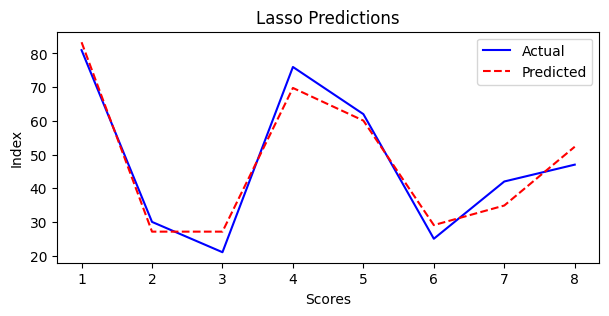

Intercept of the Lasso: 2.8698419112076294
Coefficient of the Lasso: [9.69594424]


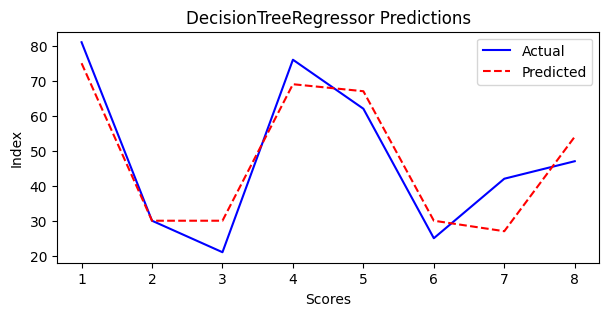

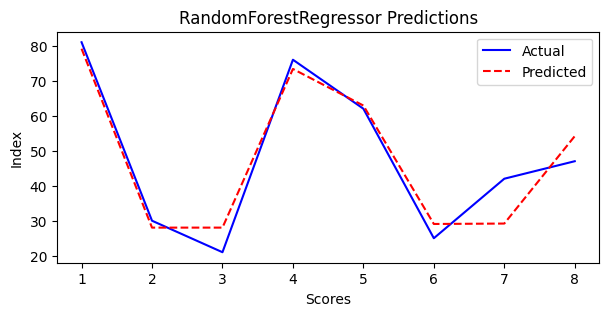

,Model,Mean Squared Error,Mean Absolute Error,R-squared
1,LinearRegression,23.619,4.500,0.94278
2,Ridge,23.640,4.500,0.94263
3,Lasso,23.657,4.500,0.94252
4,DecisionTreeRegressor,61.250,6.750,0.83554
5,RandomForestRegressor,37.061,4.806,0.91236


In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

LG = LinearRegression()
Ridge = Ridge(alpha=0.1)
Lasso = Lasso(alpha=0.1)
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()

models = [LG, Ridge, Lasso, DT, RF]
results=[]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test).round(3)
    mae = mean_absolute_error(y_pred, y_test).round(3)
    r2 = r2_score(y_pred, y_test).round(5)
    results.append({'Model': model.__class__.__name__,
                    'Mean Squared Error': mse,
                    'Mean Absolute Error': mae,
                    'R-squared': r2})
    plt.figure(figsize=(7,3))
    n = [i for i in range(1, len(y_test) + 1)]
    plt.plot(n,y_test, label='Actual', linestyle='-', color='blue',)
    plt.plot(n,y_pred, label='Predicted', linestyle='dashed', color='red')
    plt.xlabel('Scores')
    plt.ylabel('Index')
    plt.title(f'{model.__class__.__name__} Predictions')
    plt.legend()
    plt.show()
    if model.__class__.__name__ in ['LinearRegression', 'Ridge', 'Lasso']:
        print(f'Intercept of the {model.__class__.__name__}: {model.intercept_}')
        print(f'Coefficient of the {model.__class__.__name__}: {model.coef_}')
    
results_df = pd.DataFrame(results, index=[1, 2, 3, 4, 5])  # Menambahkan indeks pada DataFrame
display(results_df)

In [66]:
import pickle

# Menyimpan model menggunakan pickle
filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(LG, file)

In [68]:
# Memuat model dari file menggunakan pickle
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# melakukan prediksi
prediction = loaded_model.predict([[5.2]])
print(prediction.round(1))


[53.3]


c:\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
